<a href="https://colab.research.google.com/github/trDalmi/Behavioural-Cloning-of-Self-Driving-Car-for-tracks/blob/master/Behavioural_Cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import ntpath
import random
from sklearn.utils import shuffle

In [ ]:
import os

In [ ]:
columns = ['center','left','right','steering','throttle','reverse','speed']
df = pd.read_csv("/content/driving_log.csv",names = columns)
pd.set_option('display.max_colwidth',None)

In [ ]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Data\IMG\center_2025_03_17_15_08_20_816.jpg,C:\Data\IMG\left_2025_03_17_15_08_20_816.jpg,C:\Data\IMG\right_2025_03_17_15_08_20_816.jpg,0.0,0.0,0.0,0.000082
1,C:\Data\IMG\center_2025_03_17_15_08_20_917.jpg,C:\Data\IMG\left_2025_03_17_15_08_20_917.jpg,C:\Data\IMG\right_2025_03_17_15_08_20_917.jpg,0.0,0.0,0.0,0.000082
2,C:\Data\IMG\center_2025_03_17_15_08_21_020.jpg,C:\Data\IMG\left_2025_03_17_15_08_21_020.jpg,C:\Data\IMG\right_2025_03_17_15_08_21_020.jpg,0.0,0.0,0.0,0.000082
3,C:\Data\IMG\center_2025_03_17_15_08_21_122.jpg,C:\Data\IMG\left_2025_03_17_15_08_21_122.jpg,C:\Data\IMG\right_2025_03_17_15_08_21_122.jpg,0.0,0.0,0.0,0.000081
4,C:\Data\IMG\center_2025_03_17_15_08_21_224.jpg,C:\Data\IMG\left_2025_03_17_15_08_21_224.jpg,C:\Data\IMG\right_2025_03_17_15_08_21_224.jpg,0.0,0.0,0.0,0.000081


In [ ]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
df['center'] = df['center'].apply(path_leaf)
df['left'] = df['left'].apply(path_leaf)
df['right'] = df['right'].apply(path_leaf)

In [ ]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2025_03_17_15_08_20_816.jpg,left_2025_03_17_15_08_20_816.jpg,right_2025_03_17_15_08_20_816.jpg,0.0,0.0,0.0,0.000082
1,center_2025_03_17_15_08_20_917.jpg,left_2025_03_17_15_08_20_917.jpg,right_2025_03_17_15_08_20_917.jpg,0.0,0.0,0.0,0.000082
2,center_2025_03_17_15_08_21_020.jpg,left_2025_03_17_15_08_21_020.jpg,right_2025_03_17_15_08_21_020.jpg,0.0,0.0,0.0,0.000082
3,center_2025_03_17_15_08_21_122.jpg,left_2025_03_17_15_08_21_122.jpg,right_2025_03_17_15_08_21_122.jpg,0.0,0.0,0.0,0.000081
4,center_2025_03_17_15_08_21_224.jpg,left_2025_03_17_15_08_21_224.jpg,right_2025_03_17_15_08_21_224.jpg,0.0,0.0,0.0,0.000081


# Visualising Data


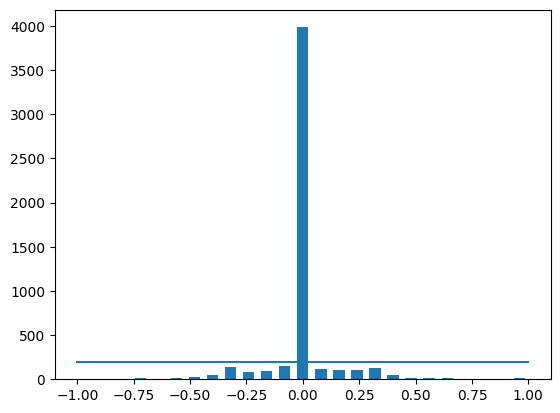

In [ ]:
num_bins = 25
samples_per_bins = 200
hist,bins = np.histogram(df['steering'],num_bins)
center = (bins[:-1]+bins[1:])*0.5
plt.bar(center,hist,width=0.05)
plt.plot((np.min(df['steering']),np.max(df['steering'])),(samples_per_bins,samples_per_bins))
plt.show()

total data: 1351
removed: 0
remaining: 1351


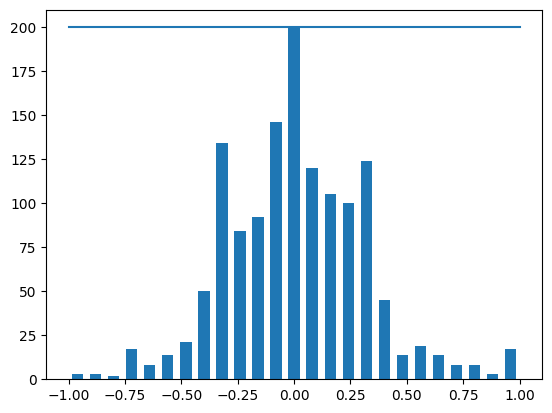

In [ ]:
print('total data:', len(df))
remove_list = []
for j in range(num_bins):
  list_ = []
  # Iterate through the DataFrame using index values
  for index in df.index:
    if df.loc[index, 'steering'] >= bins[j] and df.loc[index, 'steering'] <= bins[j+1]:
      list_.append(index)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bins:] # Assuming samples_per_bins is defined elsewhere
  remove_list.extend(list_)

print('removed:', len(remove_list))
df.drop(df.index[remove_list], inplace=True) # Remove rows based on index values in remove_list
print('remaining:', len(df))

hist, _ = np.histogram(df['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df['steering']), np.max(df['steering'])), (samples_per_bins, samples_per_bins)) # Assuming samples_per_bins is defined elsewhere

In [ ]:
print(df.iloc[i])
def load_img_steering(datadir,df):
  image_path = []
  steering = []
  for i in range(len(df)):
    indexed_data = df.iloc[i]
    center,left,right = indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))

center      center_2025_03_17_15_08_22_673.jpg
left          left_2025_03_17_15_08_22_673.jpg
right        right_2025_03_17_15_08_22_673.jpg
steering                                   0.0
throttle                                   0.0
reverse                                    0.0
speed                                 0.000083
Name: 18, dtype: object
